In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/kaggle/input'):
        print(dirname)

In [ ]:
train_path = "/content/drive/MyDrive/CPS843 Data/TRAIN"
test_path = "/content/drive/MyDrive/CPS843 Data/TEST"

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [ ]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 250/250 [00:03<00:00, 68.64it/s]


In [ ]:
data.shape

(500, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'Recycling': 250, 'Organic': 250})

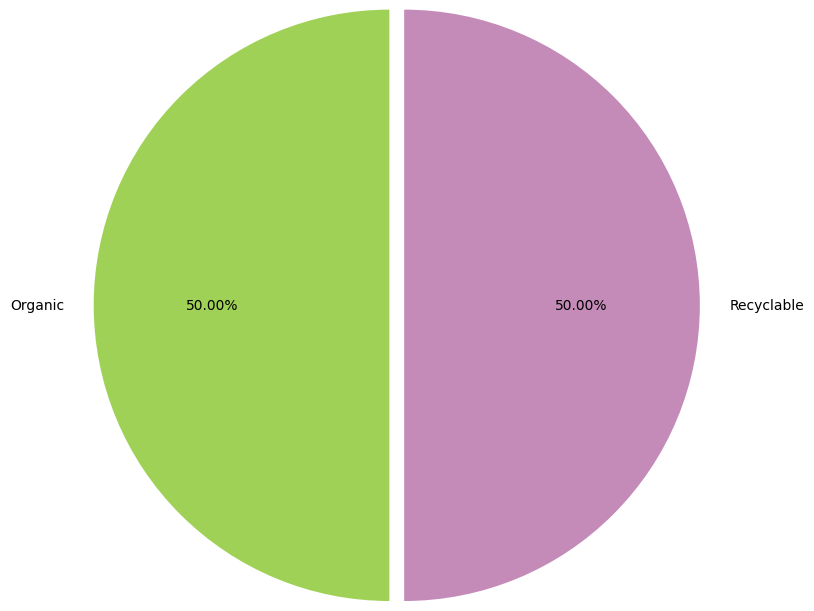

In [ ]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

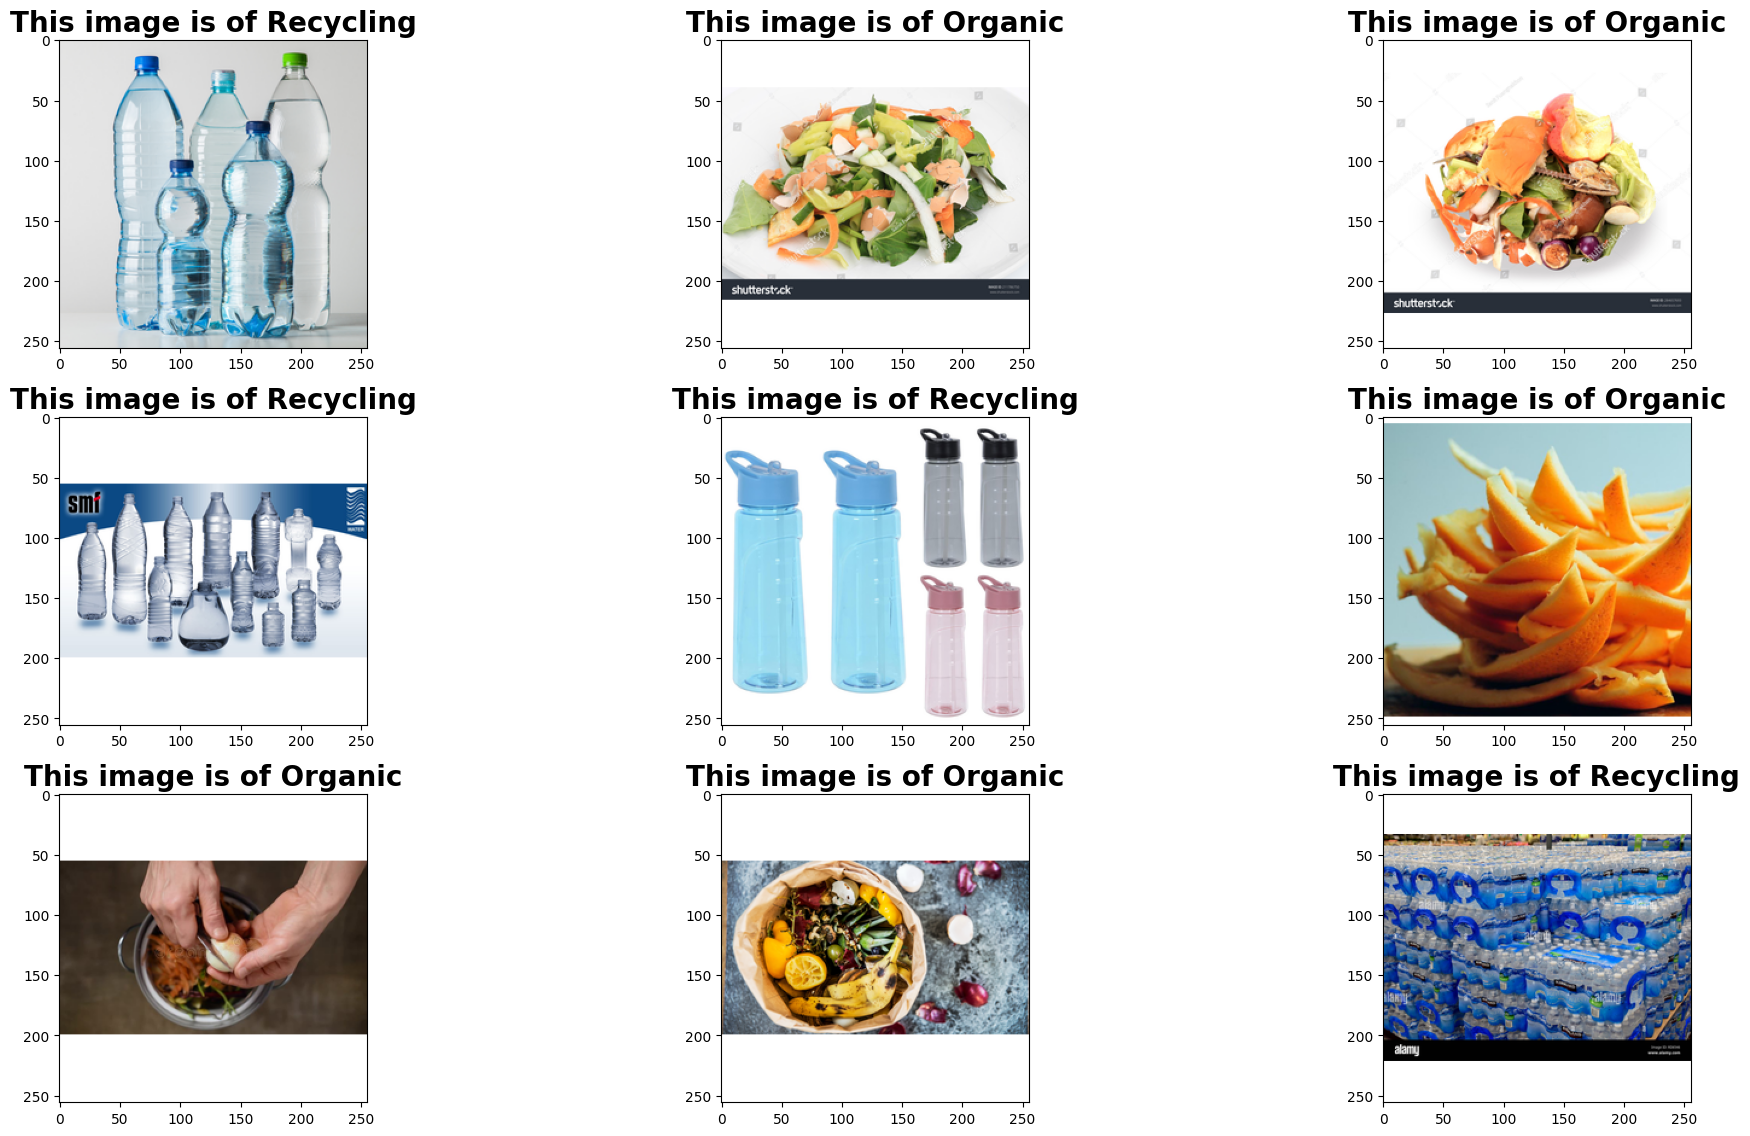

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(500)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

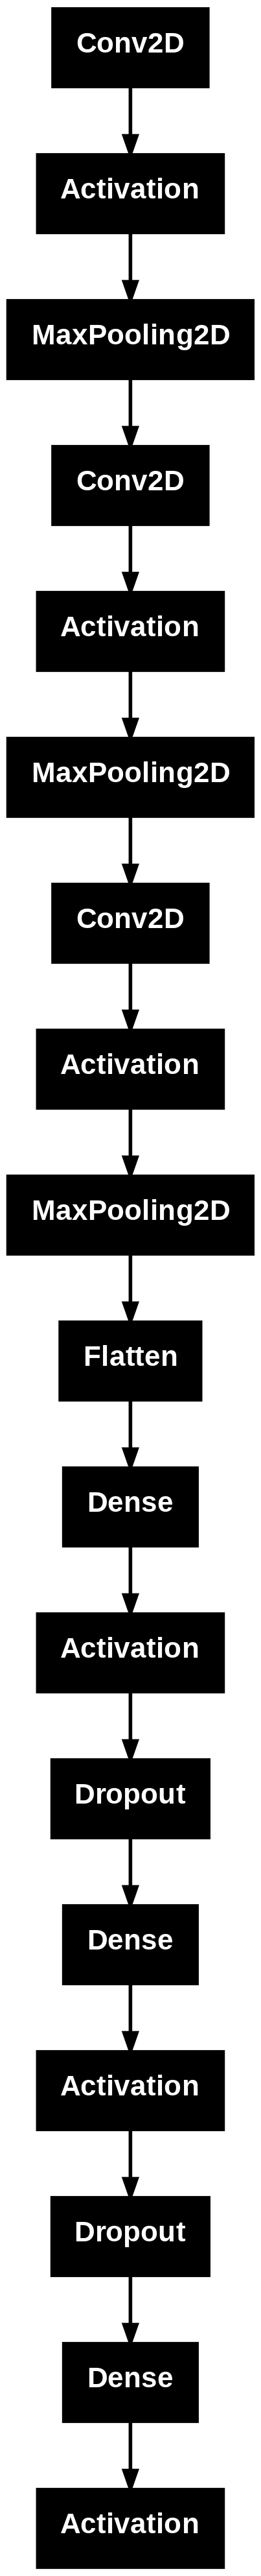

In [ ]:
plot_model(model)

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)


In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 500 images belonging to 2 classes.
Found 1874 images belonging to 2 classes.


In [ ]:
hist = model.fit(
    train_generator,  # Use train_generator directly
    epochs=10,
    validation_data=test_generator  # Use test_generator directly
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 433s 389s/step - accuracy: 0.4691 - loss: 0.9974 - val_accuracy: 0.2487 - val_loss: 1.0508
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 149s 113s/step - accuracy: 0.5198 - loss: 0.9627 - val_accuracy: 0.8084 - val_loss: 0.6855
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 192s 97s/step - accuracy: 0.5833 - loss: 0.6833 - val_accuracy: 0.7577 - val_loss: 0.6367
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 129s 94s/step - accuracy: 0.6989 - loss: 0.6241 - val_accuracy: 0.5101 - val_loss: 0.6809
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 125s 95s/step - accuracy: 0.8009 - loss: 0.5173 - val_accuracy: 0.7561 - val_loss: 0.5179
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 149s 103s/step - accuracy: 0.9047 - loss: 0.3466 - val_accuracy: 0.8207 - val_loss: 0.4761
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 202s 171s/step - accuracy: 0.8762 - loss: 0.3634 - val_accuracy: 0.7705 - val_loss: 0.5171
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 211s 166s/step - accuracy: 0.9497 - loss: 0.2187 - val_accuracy: 0.8154 - val_

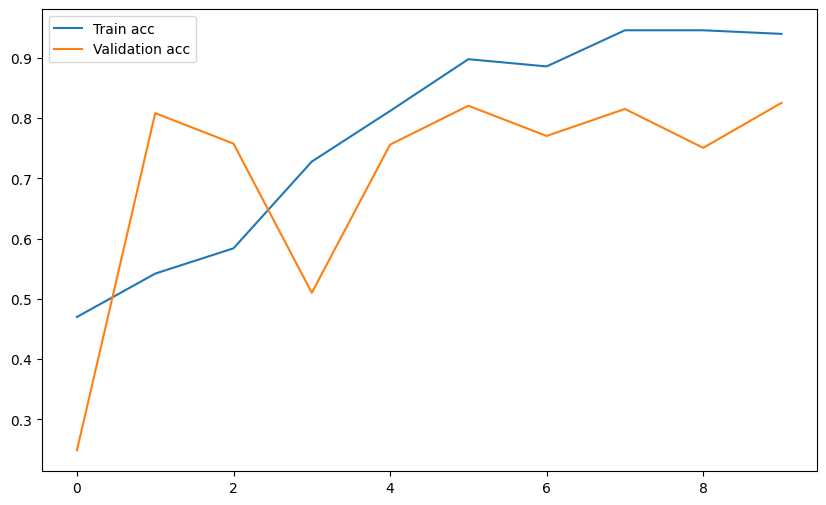

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

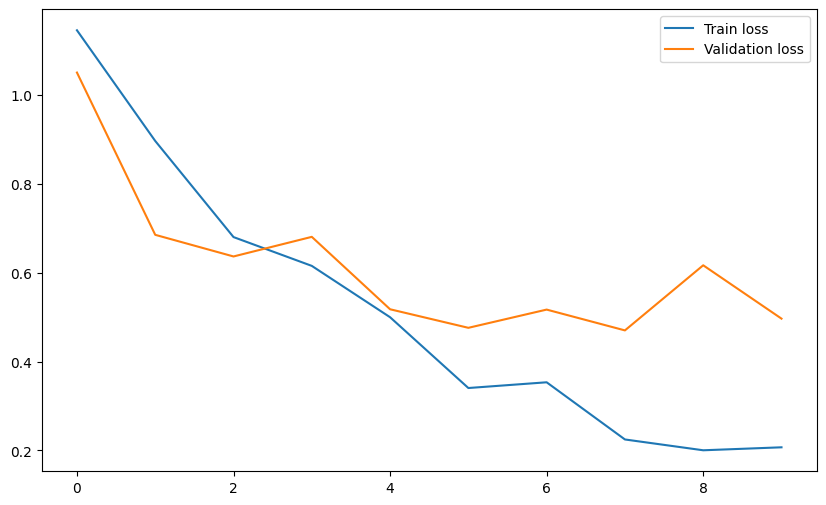

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()


In [ ]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")